In [44]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 붓꽃의 csv 데이터 읽어오기
csv= pd.read_csv('/content/data/iris_E.csv') # 시험 문제

csv
# print(csv)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
# 필요한 열 추출하기
csv_data = csv[["sepal.length", 'sepal.width', 'petal.length', 'petal.width']] # 독립 변수 4개
csv_label= csv['variety'] # 종속 변수 1개
print(csv_data, csv_label)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: variety, Length: 150, dtype: object


In [46]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 (test_size = 0.2, 즉, 학습 : 테스트 = 8 : 2)
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label, test_size = 0.2) # 시험 문제

In [47]:
# 학습, 테스트셋 값 출력
print(train_data)
print(train_label)
print(test_data)
print(test_label)

     sepal.length  sepal.width  petal.length  petal.width
67            5.8          2.7           4.1          1.0
142           5.8          2.7           5.1          1.9
78            6.0          2.9           4.5          1.5
11            4.8          3.4           1.6          0.2
83            6.0          2.7           5.1          1.6
..            ...          ...           ...          ...
86            6.7          3.1           4.7          1.5
64            5.6          2.9           3.6          1.3
58            6.6          2.9           4.6          1.3
61            5.9          3.0           4.2          1.5
30            4.8          3.1           1.6          0.2

[120 rows x 4 columns]
67     versicolor
142     virginica
78     versicolor
11         setosa
83     versicolor
          ...    
86     versicolor
64     versicolor
58     versicolor
61     versicolor
30         setosa
Name: variety, Length: 120, dtype: object
     sepal.length  sepal.width  petal.le

In [48]:
# shape 출력
print(len(train_data))
print(len(train_label))
print(len(test_data))
print(len(test_label))

120
120
30
30


In [49]:
# 데이터 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)
print(pre)

['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa']


In [50]:
# 정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print(ac_score)

0.9666666666666667


# + 수정본

In [51]:
test_label.reset_index(drop=True, inplace=True)
count = 0 # 오답 수 저장

for i in range(test_label.shape[0]):
    if test_label[i] != pre[i]: # 실제값과 에측값이 틀린 경우
        count += 1 # 오답 수 증가
        print(test_label[i], pre[i])

# 오답 수와 정답률 출력
print('오답 수:', count)
print('정답률:', test_label.shape[0] - count, '/', test_label.shape[0], '=', (test_label.shape[0] - count)/test_label.shape[0])

versicolor virginica
오답 수: 1
정답률: 29 / 30 = 0.9666666666666667


Text(0.5, 1.0, 'Confusion Matrix')

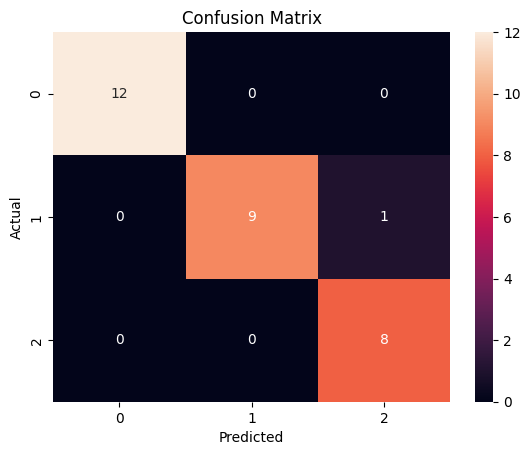

In [52]:
# confusion matrix 그리기

confusion = metrics.confusion_matrix(test_label, pre)
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
